## Predicting percentage score of a student based on study hours using supervised Machine learning

In [1]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the data 
scores_df = pd.read_csv('http://bit.ly/w-data')
scores_df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**From the table above ,there are two columns for the hours a student spend reading and the student score.**

**Before using machine model on the data I will first of all explore the data using graph to show if there's any relationship between both variables.**

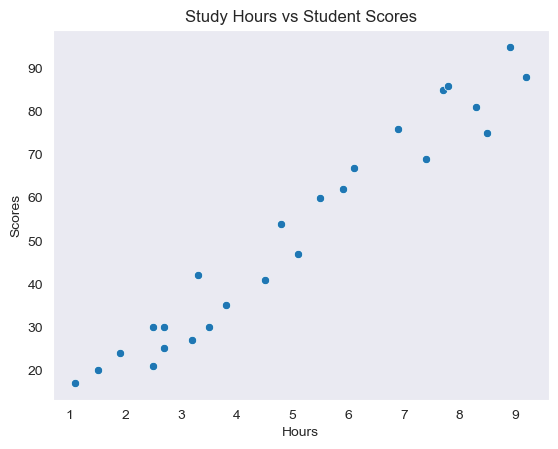

In [3]:
sns.set_style('dark')

sns.scatterplot(x='Hours', y='Scores', data=scores_df)
plt.title('Study Hours vs Student Scores')
plt.show()

**From the graph we can see that there is a linear relationship between both variables ,as the number of study hours increased the scores of the students increased.**

**Next, I will be exploring the value of correlation between both variables.**

In [4]:
#correlation of the variable
corr_val = np.corrcoef(scores_df['Hours'],scores_df['Scores'])
print(corr_val)

[[1.         0.97619066]
 [0.97619066 1.        ]]


**Both variables are strongly positive correlated i.e as study hours increase student scores also increases this therefore affirms the graph shown above**

**Next, I will be using a Linear Regression model on the data**

In [5]:
#importing required package

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split

In [6]:
X_feature = scores_df['Hours'].values.reshape(-1,1)
y_target = scores_df['Scores'].values

X_train,X_test,y_train,y_test = train_test_split(X_feature, y_target, test_size=0.1, random_state=24)

In [7]:
lin_reg = LinearRegression()
fit_model = lin_reg.fit(X_train, y_train)

In [8]:
#R-suared value
score = fit_model.score(X_train, y_train)
print('R-squared score: ' ,score)

#intercept value
intercept_val = fit_model.intercept_
print('intercept :', intercept_val)

R-squared score:  0.9498017373462783
intercept : 1.9440584332374584


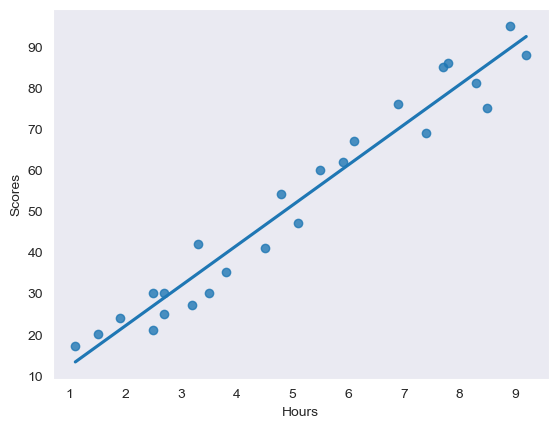

In [16]:
#Plotting the regression line
sns.regplot(x='Hours', y='Scores', data=scores_df, ci=None)
plt.show()

In [10]:
#make prediction on test dataset
predict = fit_model.predict(X_test)
print('predict: ', predict)

predict:  [26.7899308  93.37686875 39.70978443]


### Evaluating the model

**The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the root mean square error. There are many such metrics.**

In [14]:
#mse score
RMSE_score = MSE(y_test,predict,squared=True)
print('RMSE: ',RMSE_score)

RMSE:  20.465777087183707


### What will be the predicted score if a student studies for 9.25hours per day

In [11]:
#test variable 
test_var = np.array([[9.25]])
#predict on test variable
fit_model.predict(test_var)

array([93.8737862])

**A student who studies for 9.25hours will score 92.9098**